# 094202 - מבוא לניתוח נתונים בפייתון

# אביב תשפ"ג - תרגיל בית 3

## חלק א' - תיאור קובץ הנתונים

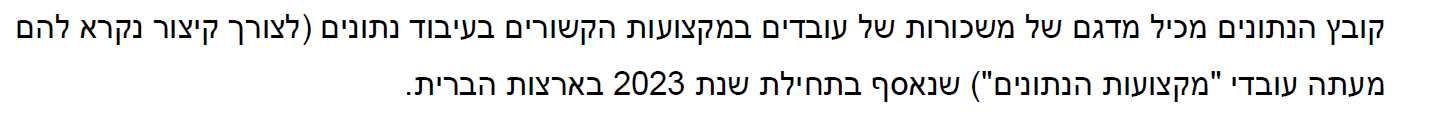

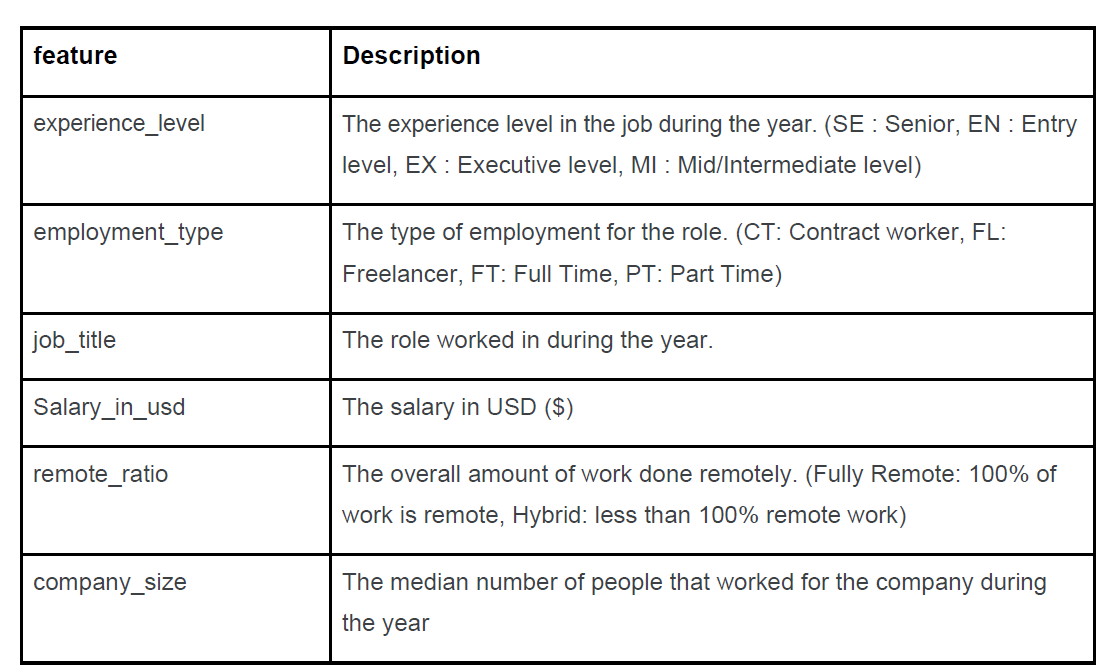

### שאלות

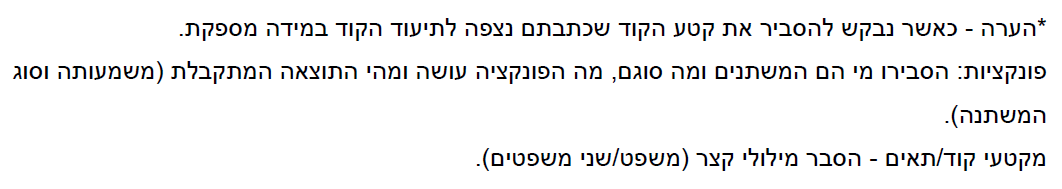

In [1]:
#Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('tableau-colorblind10')
import seaborn as sns
sns.set_palette("viridis")
from tqdm import tqdm

In [2]:
#Reading the 'aviation_accident_data.csv' file:
df_salaries = pd.read_csv('ds_salaries.csv')
df_salaries

experience_level employment_type                  job_title  \
0                  MI              CT                ML Engineer   
1                  MI              CT                ML Engineer   
2                  SE              FT          Applied Scientist   
3                  SE              FT          Applied Scientist   
4                  SE              FT             Data Scientist   
...               ...             ...                        ...   
1560               SE              FT  Machine Learning Engineer   
1561               MI              FT             Data Scientist   
1562               MI              FT             Data Scientist   
1563               EN              FT              Data Engineer   
1564               EN              FT              Data Engineer   

      salary_in_usd  remote_ratio company_size  
0             30000  fully remote            S  
1             25500  fully remote            S  
2            222200        hybrid            L  
3            136000        hybrid            L  
4            147100        hybrid            M  
...             ...           ...          ...  
1560         134500        hybrid            L  
1561         130000        hybrid            M  
1562          90000        hybrid            M  
1563         160000        hybrid            M  
1564         135000        hybrid            M  

[1565 rows x 6 columns]

#### :שאלה מס' 1

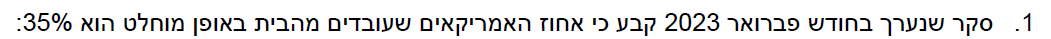

https://www.pewresearch.org/short-reads/2023/03/30/about-a-third-of-us-workers-who-can-work-from-home-do-so-all-the-time/

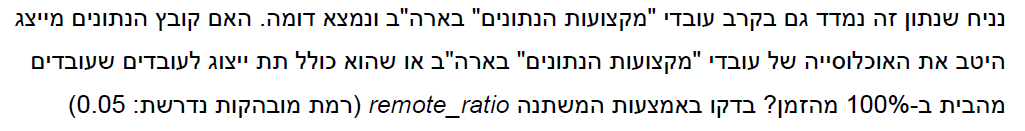

#### 'סעיף א

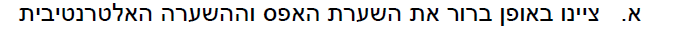

#### Solution

We were told that it was measured among the workers of the "data professions" in the United States that the percentage of workers from home absolutely is 35%.
Therefore, in order to test whether our dataset is a good representation of the population of "data professions" workers in the United States, we will test the following hypothesis:

The null hypothesis: The percentage of workers from home among "data professions" workers in the United States in the data file is equal to 35%

Alternative hypothesis: The percentage of workers from home among "data professions" workers in the United States in the data file is less then 35%

#### 'סעיף ב

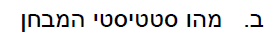

In [3]:
value_counts = df_salaries[['remote_ratio']].value_counts()
value_counts

remote_ratio
hybrid          1057
fully remote     508
dtype: int64

#### Solution

In [4]:
value_counts = df_salaries[['remote_ratio']].value_counts()
test_statistic = (value_counts['fully remote'] / len(df_salaries[['remote_ratio']])) * 100
formatted_number = "{:.2f}".format(test_statistic)
print(f'The test statistic is the percentage of workers from home among "data professions" workers in the United States\nin the data file, that is equal to {formatted_number}%')

The test statistic is the percentage of workers from home among "data professions" workers in the United States
in the data file, that is equal to 32.46%


#### 'סעיף ג

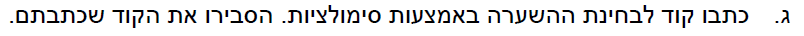

#### Solution

In [5]:
work_location = ['fully remote', 'hybrid'] # possible work location
prob_for_item = [35/100, 65/100] # probabilities GIVEN THE MODEL IS TRUE
sample_size = df_salaries.shape[0] # the number of employees sampled

# simulate one value
def prob_fully_remote():
    '''This function returns a number that represents the percentage of "data professions"
    that work from home full time in each sample'''  
    sample_work_location = np.random.choice(work_location, p=prob_for_item, size=sample_size)
    num_fully_remote = np.count_nonzero(sample_work_location == 'fully remote')
    return (num_fully_remote/sample_size) * 100

#### 'סעיף ד

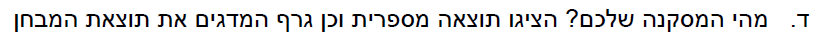

#### Solution

In [6]:
# run multiple simulations
num_repetitions = 20000
many_prob_fully_remote = np.array([prob_fully_remote() for i in range(num_repetitions)])

# plot the empirical distribution of the statistic
facetgrid_obj = sns.displot(many_prob_fully_remote, bins=np.unique(many_prob_fully_remote), stat='probability') # Defining the bins
facetgrid_obj.fig.set_size_inches(10, 7)
facetgrid_obj.set(title='Distribution of simulation results assuming the model is true', xlabel='precentage of working from home in a sample', ylabel='Proportion of simulations')

# Add a red point on the plot marking our data
facetgrid_obj.axes[0, 0].scatter(test_statistic, 0, s=150, color='red')  # draw observed value
facetgrid_obj.axes[0, 0].legend(['Test statistic'])

In [7]:
# Count the number of simulations less than or equal to the observed test statistic
num_simulations = np.count_nonzero(many_prob_fully_remote <= test_statistic)

# Calculate the p-value by dividing the count by the total number of simulations
p_value = num_simulations / num_repetitions

# Print the calculated p-value
print(f'The p-value is {p_value}')

The p-value is 0.0182


According to the P-value we received, it can be seen that at a significance level of 5% the null hypothesis can definitely be rejected and this is because the P-value we received is significantly smaller than 5%.
Therefore, our dataset is **not** a good representation of the population of "data professions" workers in the United State.

#### :שאלה מס' 2

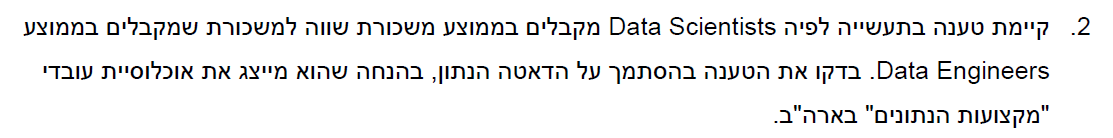

#### 'סעיף א

#### Solution

$H_{0}$: The mean salery of Data Scientists is equal to the mean salery of Data Engineers<br>
Therfore, the mean salery of Data Scientists less the mean salery of Data Engineers is equal to 0.<br>
$H_{1}$: The mean salery of Data Scientists is **not** equal to the mean salery of Data Engineerss<br>
Therfore, the mean salery of Data Scientists less the mean salery of Data Engineers is **not** equal to 0.

#### 'סעיף ב

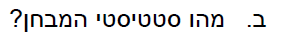

#### Solution

In [8]:
grpby_var = df_salaries.groupby('job_title')
avgs = grpby_var['salary_in_usd'].mean()  
test_statistic = avgs.loc['Data Scientist'] - avgs.loc['Data Engineer']
formatted_number = "{:.2f}".format(test_statistic)
print(f'Under the assumption that the given data represents the population of "data professions" workers in the United States,\nOur test statistic is the difference between the average salary of the Data Scientists,\nand the average salary of the Data Engineers in the given data: {formatted_number}')

Under the assumption that the given data represents the population of "data professions" workers in the United States,
Our test statistic is the difference between the average salary of the Data Scientists,
and the average salary of the Data Engineers in the given data: 12686.68


#### 'סעיף ג

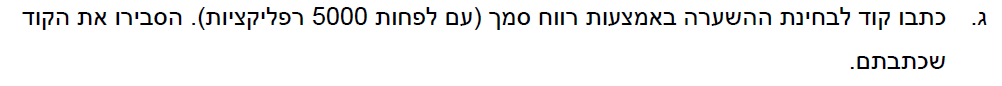

#### Solution

In [9]:
# function that returns the difference in averages
def diff_of_avgs(df, column_name, grouping_var):
    '''This function returns the difference between the average salary of the Data Scientists,
        and the average salary of the Data Engineers'''
    grpby_var = df.groupby(grouping_var)
    avgs = grpby_var[column_name].mean()
    return avgs.loc['Data Scientist'] - avgs.loc['Data Engineer']  

def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    '''This function returns an array of bootstrapped differences between two sample averages:
      original_sample: df containing the original sample
      column_name: name of column containing the variable to average
      grouping_var: name of variable according to which to group
      num_replications: number of bootstrap samples'''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in tqdm(range(num_replications)):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

# run the bootstrap procedure
bstrap_diffs = bootstrap_mean_difference(df_salaries, 'salary_in_usd', 'job_title',  5000)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:06<00:00, 768.07it/s]


#### 'סעיף ד

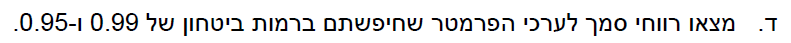

#### Solution

In [10]:
# Get the endpoints of the 95% confidence interval
left_end_99 = np.percentile(bstrap_diffs, 0.5, method='higher')
right_end_99 = np.percentile(bstrap_diffs, 99.5, method='higher')
formatted_number_left = "{:.2f}".format(left_end_99)
formatted_number_right = "{:.2f}".format(right_end_99)
print('The 99% boostsrap confidence interval for difference between the average salary of the Data Scientists,\nand the average salary of the Data Engineers', [formatted_number_left, formatted_number_right])

The 99% boostsrap confidence interval for difference between the average salary of the Data Scientists,
and the average salary of the Data Engineers ['2450.06', '22738.17']


In [11]:
# Get the endpoints of the 95% confidence interval
left_end_95 = np.percentile(bstrap_diffs, 2.5, method='higher')
right_end_95 = np.percentile(bstrap_diffs, 97.5, method='higher')
formatted_number_left = "{:.2f}".format(left_end_95)
formatted_number_right = "{:.2f}".format(right_end_95)
print('The 95% boostsrap confidence interval for difference between the average salary of the Data Scientists,\nand the average salary of the Data Engineers', [formatted_number_left, formatted_number_right])

The 95% boostsrap confidence interval for difference between the average salary of the Data Scientists,
and the average salary of the Data Engineers ['4959.79', '20512.42']


#### 'סעיף ה

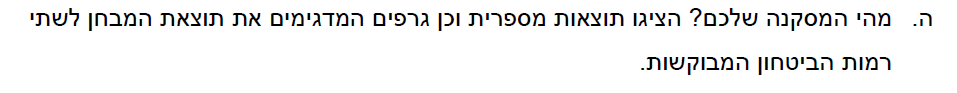

#### Solution

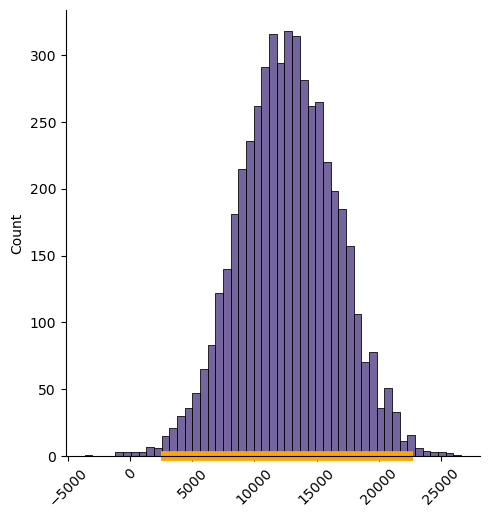

In [12]:
# visualize results
ax = sns.displot(bstrap_diffs)
plt.xticks(rotation=45)
facetgrid_obj.axes[0, 0].scatter(test_statistic, 0, s=150, color='red')  # draw observed value
plt.hlines(y=0, xmin=left_end_99, xmax=right_end_99, colors='orange', linestyles='solid', lw=7, clip_on=False);  # show line of values between 0.5 and 99.5 percentiles

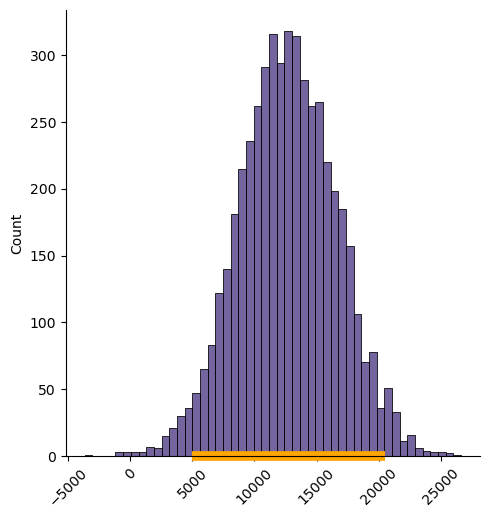

In [13]:
# visualize results
ax = sns.displot(bstrap_diffs)
plt.xticks(rotation=45)
facetgrid_obj.axes[0, 0].scatter(test_statistic, 0, s=150, color='red')  # draw observed value
plt.hlines(y=0, xmin=left_end_95, xmax=right_end_95, colors='orange', linestyles='solid', lw=7, clip_on=False);  # show line of values between 2.5 and 97.5 percentiles

In [14]:
# Count the number of replications less than or equal to the observed test statistic
num_simulations = np.count_nonzero(bstrap_diffs <= test_statistic)

# Calculate the p-value by dividing the count by the total number of simulations
p_value = num_simulations / num_repetitions

# Print the calculated p-value
print(f'The p-value is {p_value}')

The p-value is 0.12615


According to the P value we received it can be seen that both for a significance level of 5% and for significance levels of 1% the null hypothesis can **not** be rejected.
The reasoning for this is that we created two confidence intervals at a confidence level of 95% and 99% at a significance level of 5% and 1% (we learned that a confidence level is equal to one minus the required significance level), and we obtained a P-value that is higher then 5% and 1%, so we can **not** reject the null hypothesis for each of the significance levels we tested.

#### :שאלה מס' 3

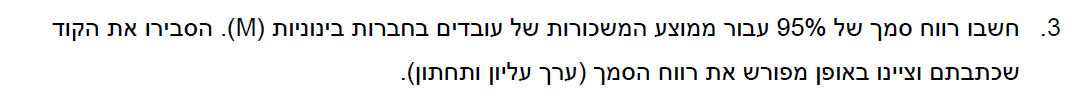

#### Solution

In [15]:
def avg_of_salary_of_M_workers(df, column_name, grouping_var):
    '''This function returns the average salary of "data professions" workers in M size companies'''
    grpby_var = df.groupby(grouping_var)
    avgs = grpby_var[column_name].mean()
    return avgs.loc['M'] 

def bootstrap_mean_M_workers(original_sample, column_name, grouping_var, num_replications):
    '''This function returns an array of bootstrapped average
    of salary of "data professions" workers in M size companies:
    original_sample: df containing the original sample
    column_name: name of column containing the variable to average
    grouping_var: name of variable according to which to group
    num_replications: number of bootstrap samples'''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_M_workers = np.empty(num_replications)
    for i in tqdm(range(num_replications)):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean_M_workers = avg_of_salary_of_M_workers(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_M_workers[i] = resampled_mean_M_workers
    
    return bstrap_mean_M_workers

# run the bootstrap procedure
bstrap_mean_M_workers = bootstrap_mean_M_workers(df_salaries, 'salary_in_usd', 'company_size',  5000)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1066.87it/s]


In [16]:
# Get the endpoints of the 95% confidence interval
left_end_95 = np.percentile(bstrap_mean_M_workers, 2.5, method='higher')
right_end_95 = np.percentile(bstrap_mean_M_workers, 97.5, method='higher')
formatted_number_left = "{:.2f}".format(left_end_95)
formatted_number_right = "{:.2f}".format(right_end_95)
print('The 95% boostsrap confidence interval for the average salary of "data professions" workers\nin M size companies', [formatted_number_left, formatted_number_right])

The 95% boostsrap confidence interval for the average salary of "data professions" workers
in M size companies ['153729.56', '159294.25']


#### :שאלה מס' 4

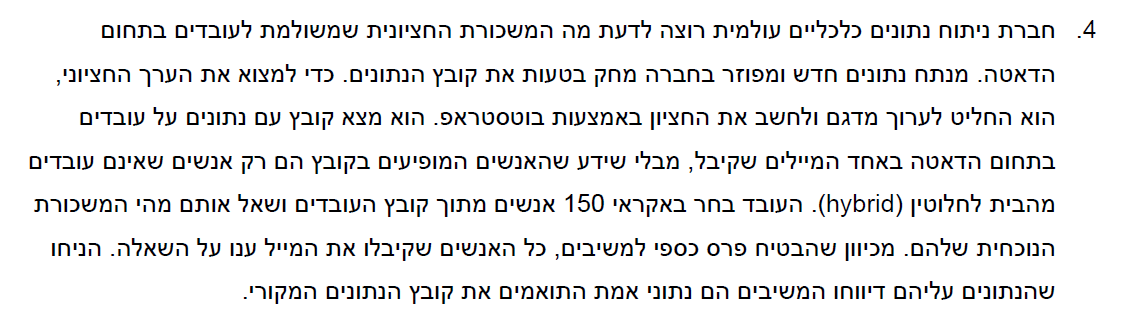

#### 'סעיף א

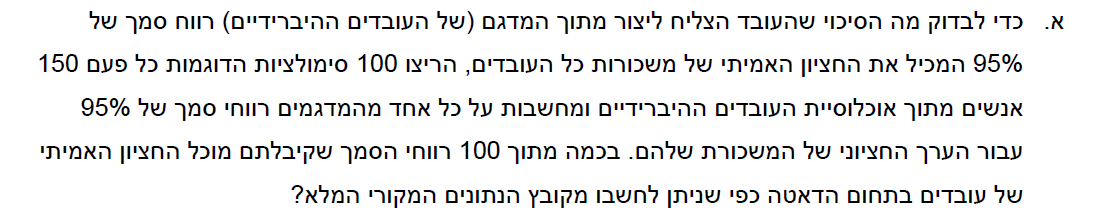

#### Solution

In [17]:
def bootstrap_median(original_sample, column_name, num_replications):
    '''This function returns an array of bootstrapped sample medians:
    original_sample: df containing the original sample
    column_name: name of column containing the variable of interest
    num_replications: number of bootstrap samples to draw '''  
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_var_of_interest = original_sample[[column_name]] # the use of [[]] will return a df rather than series
    bstrap_medians = np.empty(num_replications) # collection array for our estimates
    for i in range(num_replications):
        bootstrap_sample = original_sample_var_of_interest.sample(n=original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_median = bootstrap_sample.quantile(0.5, interpolation='higher')
        bstrap_medians[i] = resampled_median
    
    return bstrap_medians

In [18]:
# BIG simulation, may take a few minutes
filt = (df_salaries['remote_ratio'] == 'hybrid')
df_hybrid = df_salaries[filt]
data_median = df_hybrid[['salary_in_usd']].quantile(0.5, interpolation='higher')[0]

left_ends = []
right_ends = []
median_in_interval = []
for i in tqdm(range(100)):
    median_hybrid_sample = df_hybrid.sample(150, replace=False) # note: here, sampling from the population
    medians = bootstrap_median(median_hybrid_sample, 'salary_in_usd', 5000) # then using the bootstrap method to get confidence interval
    left = np.percentile(medians, 2.5, method='higher')
    left_ends.append(left)
    right = np.percentile(medians, 97.5, method='higher')
    right_ends.append(right)
    median_in_interval.append((data_median < right) and (data_median > left))
    
print('in', np.count_nonzero(median_in_interval), 'of 100 runs of the bootstrap process, the data salary median was inside the interval')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:08<00:00,  3.09s/it]

in 95 of 100 runs of the bootstrap process, the data salary median was inside the interval


#### 'סעיף ב

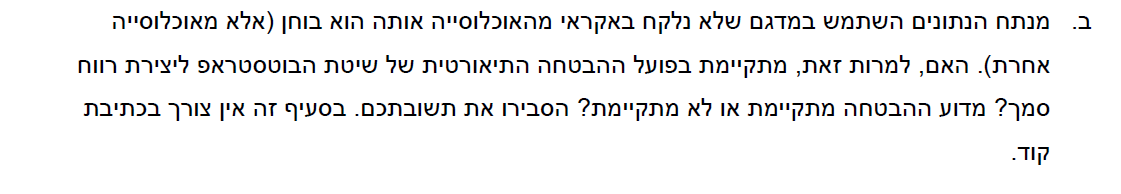

#### Solution

When performing a bootstrap, it is assumed that the sample taken from the population in each replication is chosen randomly, but we are given that the sample chosen from the population it is examining is not chosen at random. In general, if your sample is biased in some way (not random),
then נootstrap will not help you.
Therefore, the theoretical promise of the bootstrap method for creating a confidence interval is not fulfilled.

#### 'סעיף ג

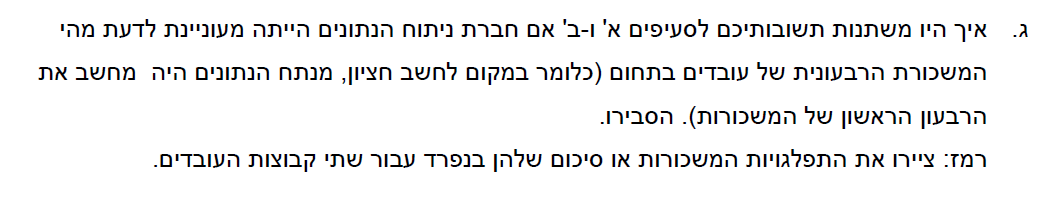

#### Solution

120000

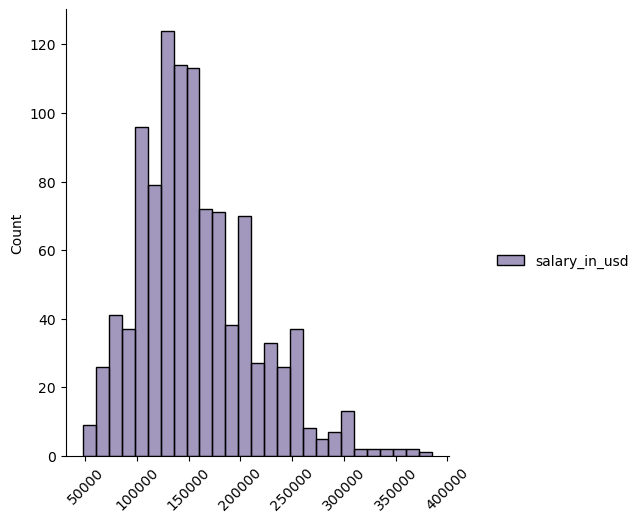

In [19]:
#A:
filt = (df_salaries['remote_ratio'] == 'hybrid')
df_hybrid = df_salaries[filt]
# visualize results
ax = sns.displot(df_hybrid[['salary_in_usd']])
plt.xticks(rotation=45)
data_quantile = df_hybrid[['salary_in_usd']].quantile(0.25, interpolation='higher')[0]
data_quantile

def bootstrap_quantile(original_sample, column_name, num_replications):
    '''This function returns an array of bootstrapped sample quantiles:
    original_sample: df containing the original sample
    column_name: name of column containing the variable of interest
    num_replications: number of bootstrap samples to draw '''  
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_var_of_interest = original_sample[[column_name]] # the use of [[]] will return a df rather than series
    bstrap_quantiles = np.empty(num_replications) # collection array for our estimates
    for i in range(num_replications):
        bootstrap_sample = original_sample_var_of_interest.sample(n=original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_quantile = bootstrap_sample.quantile(0.25, interpolation='higher')
        bstrap_quantiles[i] = resampled_quantile
    
    return bstrap_quantiles

# BIG simulation, may take a few minutes
filt = (df_salaries['remote_ratio'] == 'hybrid')
df_hybrid = df_salaries[filt]
data_quantile = df_hybrid[['salary_in_usd']].quantile(0.25, interpolation='higher')[0]

left_ends = []
right_ends = []
quantile_in_interval = []
for i in tqdm(range(100)):
    quantile_hybrid_sample = df_hybrid.sample(150, replace=False) # note: here, sampling from the population
    quantiles = bootstrap_quantile(quantile_hybrid_sample, 'salary_in_usd', 5000) # then using the bootstrap method to get confidence interval
    left = np.percentile(quantiles, 2.5, method='higher')
    left_ends.append(left)
    right = np.percentile(quantiles, 97.5, method='higher')
    right_ends.append(right)
    quantile_in_interval.append((data_quantile < right) and (data_quantile > left))
    
print('in', np.count_nonzero(quantile_in_interval), 'of 100 runs of the bootstrap process, the data salary quantile was inside the interval')

## 'חלק ב

#### :שאלה מס' 1

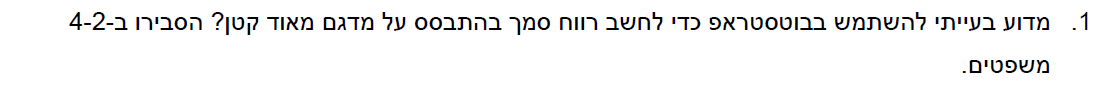

#### Solution

It is problematic to use bootstrap to calculate a confidence interval based on a very small sample because if the sample is too small then its empirical distribution does not reliably represent the probability distribution of the population.

#### :שאלה מס' 2

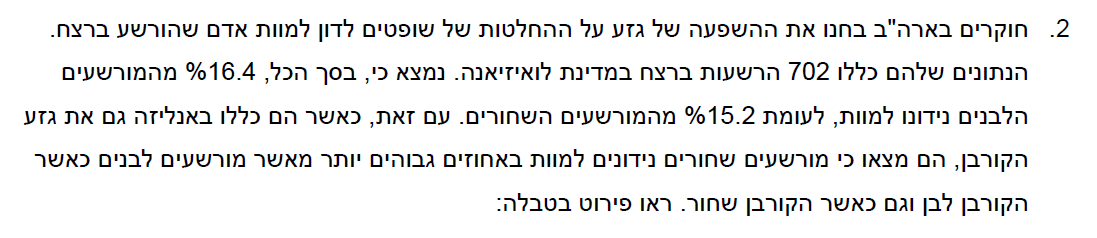

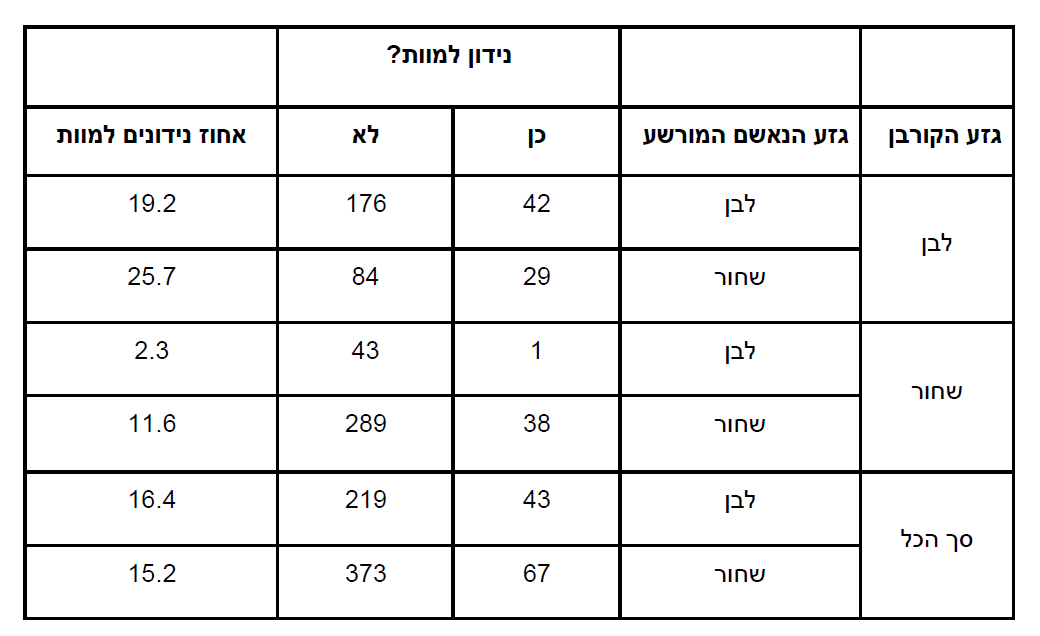

#### 'סעיף א

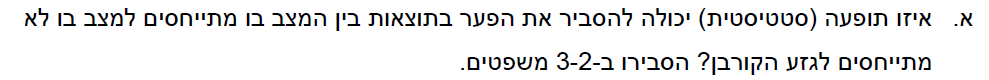

#### Solution

The statistical phenomenon that can explain the gap in the results in which the race of the victim is not considered is "Simpson's Paradox".<br>
The explanation for this is that when the race of the victim is not taken into account, then you get a fairly equal percentage of those sentenced to death between blacks and whites (and even higher than one percent).<br>
However, when the race of the victim is considered, it can certainly be seen that the percentage of blacks sentenced to death is significantly higher than that of whites.<br>
Therefore, we are not considering an important variable when studying the relationship.

#### 'סעיף ב

#### 1 תת סעיף 

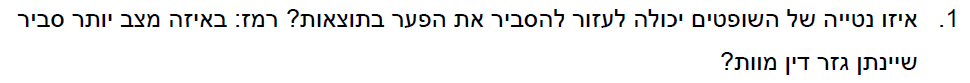

#### Solution

Based on the table, the tendency of the judges that can explain the gap in the results is to make the sentence worse when the victim is white, and this is in accordance with the fact that it can be seen in the table that the percentage of those sentenced to death when the victim is white is significantly higher in the case where the victim is black, regardless of the race of the accused.

#### 2 תת סעיף 

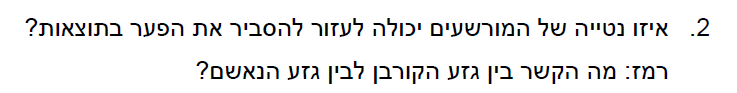

#### Solution

Based on the table, the tendency of the convicts that can explain the gap in the results is to kill mainly people of the same race as the accused,<br>
and according to this in the table you can see that mainly whites kill whites,<br>
and according to what we saw in the previous section (the tendency to punish more severely accused who killed whites), then more whites are found themselves condemned to death.